### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [1]:
from nsepy import get_history as gh
import datetime as dt
import pandas as pd

In [2]:
start = dt.datetime(2018,1,1)
end = dt.datetime(2020,11,25)
df= gh(symbol='SBIN',start=start,end=end)

In [3]:
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2018-01-01,SBIN,EQ,309.90,310.6,312.75,306.30,306.75,307.10,309.08,12182400,3.765315e+14,75769,5697288,0.4677
2018-01-02,SBIN,EQ,307.10,309.0,309.00,301.35,303.00,303.25,304.00,14797364,4.498328e+14,100195,5698196,0.3851
2018-01-03,SBIN,EQ,303.25,305.3,306.45,302.15,302.80,302.85,304.32,13857373,4.217070e+14,117207,6941140,0.5009
2018-01-04,SBIN,EQ,302.85,304.5,310.20,303.15,309.25,308.50,307.63,24517099,7.542211e+14,140513,10508054,0.4286
2018-01-05,SBIN,EQ,308.50,311.4,311.40,305.60,307.25,306.35,308.05,14580575,4.491544e+14,91829,4896408,0.3358


In [4]:
df.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-11-19,SBIN,EQ,252.00,248.00,251.80,239.00,239.5,239.75,245.83,82284278,2.022760e+15,402167,14617497,0.1776
2020-11-20,SBIN,EQ,239.75,241.50,245.40,233.95,242.0,242.75,239.89,84411129,2.024941e+15,371175,7680402,0.0910
2020-11-23,SBIN,EQ,242.75,243.50,246.15,238.10,238.6,238.70,240.76,57538324,1.385295e+15,258879,7663237,0.1332
2020-11-24,SBIN,EQ,238.70,240.50,245.00,239.50,244.4,243.85,241.91,47636611,1.152389e+15,238186,10573973,0.2220
2020-11-25,SBIN,EQ,243.85,245.45,249.90,241.60,243.0,243.00,246.09,74767232,1.839933e+15,306740,10185429,0.1362


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1.max()

372.4

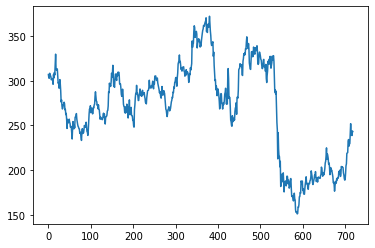

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [53]:
import numpy as np

In [54]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
# np.array(df1).reshape(-1,1)

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [56]:
df1

array([[0.70525841],
       [0.68788084],
       [0.68607538],
       [0.71157752],
       [0.70187317],
       [0.69939066],
       [0.69262018],
       [0.67817648],
       [0.6831415 ],
       [0.68336719],
       [0.68494696],
       [0.6558339 ],
       [0.70525841],
       [0.68788084],
       [0.71496276],
       [0.70255021],
       [0.7549086 ],
       [0.80816971],
       [0.73256601],
       [0.72782668],
       [0.73437147],
       [0.73301738],
       [0.70051907],
       [0.66125028],
       [0.66440984],
       [0.63597382],
       [0.64071316],
       [0.67953058],
       [0.65696231],
       [0.62243286],
       [0.5657865 ],
       [0.57707064],
       [0.54524938],
       [0.53103137],
       [0.53622207],
       [0.55269691],
       [0.54953735],
       [0.56510946],
       [0.55788761],
       [0.52696908],
       [0.52877454],
       [0.50236967],
       [0.5084631 ],
       [0.47709321],
       [0.43240803],
       [0.47822162],
       [0.46219815],
       [0.460

In [57]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [58]:
training_size,test_size

(467, 252)

In [59]:
train_data

array([[0.70525841],
       [0.68788084],
       [0.68607538],
       [0.71157752],
       [0.70187317],
       [0.69939066],
       [0.69262018],
       [0.67817648],
       [0.6831415 ],
       [0.68336719],
       [0.68494696],
       [0.6558339 ],
       [0.70525841],
       [0.68788084],
       [0.71496276],
       [0.70255021],
       [0.7549086 ],
       [0.80816971],
       [0.73256601],
       [0.72782668],
       [0.73437147],
       [0.73301738],
       [0.70051907],
       [0.66125028],
       [0.66440984],
       [0.63597382],
       [0.64071316],
       [0.67953058],
       [0.65696231],
       [0.62243286],
       [0.5657865 ],
       [0.57707064],
       [0.54524938],
       [0.53103137],
       [0.53622207],
       [0.55269691],
       [0.54953735],
       [0.56510946],
       [0.55788761],
       [0.52696908],
       [0.52877454],
       [0.50236967],
       [0.5084631 ],
       [0.47709321],
       [0.43240803],
       [0.47822162],
       [0.46219815],
       [0.460

In [60]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [62]:
print(X_train.shape), print(y_train.shape)

(366, 100)
(366,)


(None, None)

In [63]:
print(X_test.shape), print(ytest.shape)

(151, 100)
(151,)


(None, None)

In [64]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [67]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
6/6 [==============================] - 3s 455ms/step - loss: 0.1981 - val_loss: 0.0464
Epoch 2/100
6/6 [==============================] - 2s 304ms/step - loss: 0.0386 - val_loss: 0.0095
Epoch 3/100
6/6 [==============================] - 1s 226ms/step - loss: 0.0252 - val_loss: 0.0138
Epoch 4/100
6/6 [==============================] - 1s 172ms/step - loss: 0.0112 - val_loss: 0.0381
Epoch 5/100
6/6 [==============================] - 1s 153ms/step - loss: 0.0125 - val_loss: 0.0219
Epoch 6/100
6/6 [==============================] - 1s 177ms/step - loss: 0.0101 - val_loss: 0.0200
Epoch 7/100
6/6 [==============================] - 1s 183ms/step - loss: 0.0090 - val_loss: 0.0288
Epoch 8/100
6/6 [==============================] - 1s 196ms/step - loss: 0.0091 - val_loss: 0.0244
Epoch 9/100
6/6 [==============================] - 1s 159ms/step - loss: 0.0087 - val_loss: 0.0197
Epoch 10/100
6/6 [==============================] - 1s 159ms/step - loss: 0.0085 - val_loss: 0.0253
Epoch 11/

6/6 [==============================] - 1s 151ms/step - loss: 0.0020 - val_loss: 0.0090
Epoch 84/100
6/6 [==============================] - 1s 149ms/step - loss: 0.0020 - val_loss: 0.0096
Epoch 85/100
6/6 [==============================] - 1s 152ms/step - loss: 0.0021 - val_loss: 0.0093
Epoch 86/100
6/6 [==============================] - 1s 169ms/step - loss: 0.0021 - val_loss: 0.0094
Epoch 87/100
6/6 [==============================] - 1s 141ms/step - loss: 0.0021 - val_loss: 0.0092
Epoch 88/100
6/6 [==============================] - 1s 144ms/step - loss: 0.0019 - val_loss: 0.0088
Epoch 89/100
6/6 [==============================] - 1s 137ms/step - loss: 0.0020 - val_loss: 0.0088
Epoch 90/100
6/6 [==============================] - 1s 135ms/step - loss: 0.0021 - val_loss: 0.0088
Epoch 91/100
6/6 [==============================] - 1s 170ms/step - loss: 0.0021 - val_loss: 0.0079
Epoch 92/100
6/6 [==============================] - 1s 137ms/step - loss: 0.0020 - val_loss: 0.0078
Epoch 93/100


In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.2.0'

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [30]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

257.93500022525643

In [32]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

302.38687366588675

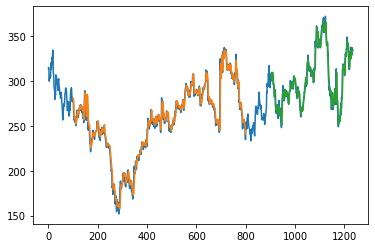

In [33]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

433

In [35]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 92)

In [36]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.6305530371713509,
 0.6121940163191298,
 0.5979147778785131,
 0.5693563009972801,
 0.5292384406165006,
 0.5407978241160473,
 0.5820489573889392,
 0.6069809610154125,
 0.6033544877606528,
 0.5562103354487761,
 0.5532638259292838,
 0.5285584768812329,
 0.5589301903898459,
 0.5507706255666366,
 0.5537171350861286,
 0.5720761559383499,
 0.6049410698096102,
 0.6131006346328197,
 0.6341795104261106,
 0.6024478694469627,
 0.5537171350861286,
 0.5829555757026291,
 0.5541704442429739,
 0.6795104261106074,
 0.7341341795104263,
 0.6835902085222124,
 0.5822756119673619,
 0.5895285584768813,
 0.5865820489573889,
 0.5394378966455123,
 0.4721214868540343,
 0.463961922030825,
 0.4449229374433362,
 0.4410698096101541,
 0.4947869446962828,
 0.463961922030825,
 0.46577515865820496,
 0.4698549410698095,
 0.48345421577515857,
 0.4725747960108796,
 0.5151858567543065,
 0.534224841341795,
 0.5380779691749774,
 0.5605167724388033,
 0.5018132366273799,
 0.5881686310063464,
 0.5893019038984589,
 0.58408884859

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=x_input.shape[1]
i=0
while(i<30):
    
    if(len(temp_input)>x_input.shape[1]):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8215895]
93
1 day input [0.61219402 0.59791478 0.5693563  0.52923844 0.54079782 0.58204896
 0.60698096 0.60335449 0.55621034 0.55326383 0.52855848 0.55893019
 0.55077063 0.55371714 0.57207616 0.60494107 0.61310063 0.63417951
 0.60244787 0.55371714 0.58295558 0.55417044 0.67951043 0.73413418
 0.68359021 0.58227561 0.58952856 0.58658205 0.5394379  0.47212149
 0.46396192 0.44492294 0.44106981 0.49478694 0.46396192 0.46577516
 0.46985494 0.48345422 0.4725748  0.51518586 0.53422484 0.53807797
 0.56051677 0.50181324 0.58816863 0.5893019  0.58408885 0.62601995
 0.72801451 0.73322756 0.73662738 0.75883953 0.75135993 0.75407978
 0.74433364 0.75453309 0.70262919 0.69900272 0.77107888 0.78558477
 0.80961015 0.80235721 0.81391659 0.80462375 0.83544878 0.83272892
 0.86922031 0.89528558 0.86151405 0.8463282  0.83612874 0.86151405
 0.83590209 0.762466   0.7475068  0.7325476  0.72982774 0.77085222
 0.8193563  0.81618314 0.82094288 0.79397099 0.7994107  0.84338169
 0.81867634 0.8143699  0.80711695 0

8 day output [[0.7990573]]
9 day input [0.55621034 0.55326383 0.52855848 0.55893019 0.55077063 0.55371714
 0.57207616 0.60494107 0.61310063 0.63417951 0.60244787 0.55371714
 0.58295558 0.55417044 0.67951043 0.73413418 0.68359021 0.58227561
 0.58952856 0.58658205 0.5394379  0.47212149 0.46396192 0.44492294
 0.44106981 0.49478694 0.46396192 0.46577516 0.46985494 0.48345422
 0.4725748  0.51518586 0.53422484 0.53807797 0.56051677 0.50181324
 0.58816863 0.5893019  0.58408885 0.62601995 0.72801451 0.73322756
 0.73662738 0.75883953 0.75135993 0.75407978 0.74433364 0.75453309
 0.70262919 0.69900272 0.77107888 0.78558477 0.80961015 0.80235721
 0.81391659 0.80462375 0.83544878 0.83272892 0.86922031 0.89528558
 0.86151405 0.8463282  0.83612874 0.86151405 0.83590209 0.762466
 0.7475068  0.7325476  0.72982774 0.77085222 0.8193563  0.81618314
 0.82094288 0.79397099 0.7994107  0.84338169 0.81867634 0.8143699
 0.80711695 0.84066183 0.82774252 0.82479601 0.82796917 0.82158953
 0.81864303 0.81605464 0.8

18 day output [[0.77077425]]
19 day input [0.60244787 0.55371714 0.58295558 0.55417044 0.67951043 0.73413418
 0.68359021 0.58227561 0.58952856 0.58658205 0.5394379  0.47212149
 0.46396192 0.44492294 0.44106981 0.49478694 0.46396192 0.46577516
 0.46985494 0.48345422 0.4725748  0.51518586 0.53422484 0.53807797
 0.56051677 0.50181324 0.58816863 0.5893019  0.58408885 0.62601995
 0.72801451 0.73322756 0.73662738 0.75883953 0.75135993 0.75407978
 0.74433364 0.75453309 0.70262919 0.69900272 0.77107888 0.78558477
 0.80961015 0.80235721 0.81391659 0.80462375 0.83544878 0.83272892
 0.86922031 0.89528558 0.86151405 0.8463282  0.83612874 0.86151405
 0.83590209 0.762466   0.7475068  0.7325476  0.72982774 0.77085222
 0.8193563  0.81618314 0.82094288 0.79397099 0.7994107  0.84338169
 0.81867634 0.8143699  0.80711695 0.84066183 0.82774252 0.82479601
 0.82796917 0.82158953 0.81864303 0.81605464 0.81345117 0.81076723
 0.80799496 0.80511683 0.80212981 0.7990573  0.79594231 0.79283106
 0.78976297 0.786766

27 day output [[0.7523257]]
28 day input [0.58658205 0.5394379  0.47212149 0.46396192 0.44492294 0.44106981
 0.49478694 0.46396192 0.46577516 0.46985494 0.48345422 0.4725748
 0.51518586 0.53422484 0.53807797 0.56051677 0.50181324 0.58816863
 0.5893019  0.58408885 0.62601995 0.72801451 0.73322756 0.73662738
 0.75883953 0.75135993 0.75407978 0.74433364 0.75453309 0.70262919
 0.69900272 0.77107888 0.78558477 0.80961015 0.80235721 0.81391659
 0.80462375 0.83544878 0.83272892 0.86922031 0.89528558 0.86151405
 0.8463282  0.83612874 0.86151405 0.83590209 0.762466   0.7475068
 0.7325476  0.72982774 0.77085222 0.8193563  0.81618314 0.82094288
 0.79397099 0.7994107  0.84338169 0.81867634 0.8143699  0.80711695
 0.84066183 0.82774252 0.82479601 0.82796917 0.82158953 0.81864303
 0.81605464 0.81345117 0.81076723 0.80799496 0.80511683 0.80212981
 0.7990573  0.79594231 0.79283106 0.78976297 0.78676689 0.78385979
 0.78104973 0.77833897 0.77572507 0.77320468 0.77077425 0.76842982
 0.76616782 0.76398474 

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [40]:
import matplotlib.pyplot as plt

In [41]:
len(df1)

1235

ValueError: x and y must have same first dimension, but have shapes (100,) and (77, 1)

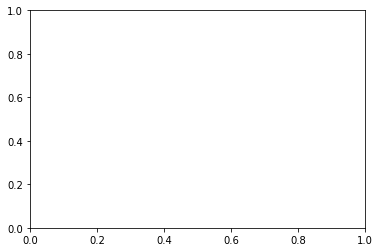

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)